In [355]:
#importing pandas library for reading dataset and performing operation on it.
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [356]:
# Data exploration and pre-processing: Performing data cleaning, visualization, and pre-processing

In [357]:

crop_data=pd.read_csv('Crop_recommendation.csv')

# printing number of row and column in dataset
print(f"the number of rows and columns  is {crop_data.shape}\n")


the number of rows and columns  is (2200, 8)



In [358]:
#printing columns of dataset
print(crop_data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [359]:
#printing first five data entries in dataset
print(crop_data.head(10))

    N     P     K  temperature   humidity        ph    rainfall label
0  90   NaN  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  74  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice
5  69  37.0  42.0    23.058049  83.370118  7.073454  251.055000  rice
6  69  55.0   NaN    22.708838  82.639414  5.700806  271.324860  rice
7  94  53.0  40.0    20.277744  82.894086  5.718627  241.974195  rice
8  89  54.0  38.0    24.515881  83.535216  6.685346  230.446236  rice
9  68  58.0  38.0    23.223974  83.033227  6.336254  221.209196  rice


In [360]:

#printing count of non-null values and datatype of each column in dataset
crop_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2196 non-null   float64
 2   K            2198 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


In [361]:
#checking null values
crop_data.isnull().sum()

N              0
P              4
K              2
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [362]:
# filling null value of N with mode
crop_data['P'].fillna(crop_data['P'].mean(), inplace=True)

# filling null value of N with mode
crop_data['K'].fillna(int(crop_data['K'].mean()), inplace=True)



In [363]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [364]:
#analysing each column sataticaly
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.369308,48.158182,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.984745,50.647005,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [365]:
#data preprocessing and cleaning

In [366]:
#ploting box plot for N
fig=px.box(crop_data,y='N',points='all')
fig.show()

In [367]:
#finding outliers for N
q1=crop_data['N'].quantile(0.25)
q3=crop_data['N'].quantile(0.75)
iqr=q3-q1
N_min=q1-(1.5*iqr)
N_max=q3+(1.5*iqr)

q3,q1,iqr,N_min,N_max

(84.25, 21.0, 63.25, -73.875, 179.125)

In [368]:
#ploting box plot for P
fig=px.box(crop_data,y='P',points='all')
fig.show()

In [369]:
#finding outliers for P
q1=crop_data['P'].quantile(0.25)
q3=crop_data['P'].quantile(0.75)
iqr=q3-q1

P_min=q1-(1.5*iqr)
P_max=q3+(1.5*iqr)

q3,q1,iqr,P_min,P_max




(68.0, 28.0, 40.0, -32.0, 128.0)

In [370]:
crop_data.loc[crop_data['P']>P_max,'P']=P_max 


In [371]:
#ploting box plot for k
fig=px.box(crop_data,y='K',points='all')
fig.show()


In [372]:
#finding outliers for k
q1=crop_data['K'].quantile(0.25)
q3=crop_data['K'].quantile(0.75)

iqr=q3-q1

K_min=q1-(1.5*iqr)
K_max=q3+(1.5*iqr)

K_min,K_max,q1,q3,iqr

(-23.5, 92.5, 20.0, 49.0, 29.0)

In [373]:
(crop_data['K']>K_max).sum()

200

In [374]:
crop_data.loc[crop_data['K']>K_max,'K']=K_max

In [375]:
#ploting box plot for temperature
fig=px.box(crop_data,y='temperature',points='all')
fig.show()

In [376]:
#finding outliers for temperature
q1=crop_data['temperature'].quantile(0.25)
q3=crop_data['temperature'].quantile(0.75)
iqr=q3-q1
temperature_min=q1-(1.5*iqr)
temperature_max=q3+(1.5*iqr)

q3,q1,iqr,temperature_min,temperature_max

(28.5616539325,
 22.7693746325,
 5.792279300000001,
 14.080955682499999,
 37.2500728825)

In [377]:
crop_data.loc[crop_data['temperature']>temperature_max,'temperature']=temperature_max

In [378]:
#ploting box plot for humidity
fig=px.box(crop_data,y='humidity',points='all')
fig.show()

In [379]:
#finding outliers for humidity
q1=crop_data['humidity'].quantile(0.25)
q3=crop_data['humidity'].quantile(0.75)

iqr=q3-q1

humidity_min=q1-(1.5*iqr)
humidity_max=q3+(1.5*iqr)

q3,q1,iqr,humidity_min,humidity_max


(89.948770755,
 60.2619528025,
 29.6868179525,
 15.731725873750001,
 134.47899768374998)

In [380]:
crop_data.loc[crop_data['humidity']>humidity_max,'humidity']=humidity_max

In [381]:
#ploting box plot for ph

fig=px.box(crop_data,y='ph',points='all')
fig.show()

In [382]:
#finding outliers for ph
q1=crop_data['ph'].quantile(0.25)
q3=crop_data['ph'].quantile(0.75)

iqr=q3-q1

ph_min=q1-(1.5*iqr)
ph_max=q3+(1.5*iqr)

ph_min,ph_max,q1,q3,iqr

(4.543768066249998,
 8.351567354250005,
 5.97169279925,
 6.923642621250002,
 0.9519498220000013)

In [383]:
crop_data.loc[crop_data['ph']>ph_max,'ph']=ph_max

In [384]:
#ploting box plot for rainfall

fig=px.box(crop_data,y='rainfall',points='all')
fig.show()

In [385]:
#finding outliers for rainfall
q1=crop_data['rainfall'].quantile(0.25)
q3=crop_data['rainfall'].quantile(0.75)
iqr=q3-q1
rainfall_min=q1-(1.5*iqr)
rainfall_max=q3+(1.5*iqr)

q3,q1,iqr,rainfall_min, rainfall_max

(124.2675078,
 64.55168599999999,
 59.715821800000015,
 -25.022046700000033,
 213.84124050000003)

In [386]:
crop_data.loc[crop_data['rainfall']>rainfall_max,'rainfall']=rainfall_max

In [387]:
#data visiualization

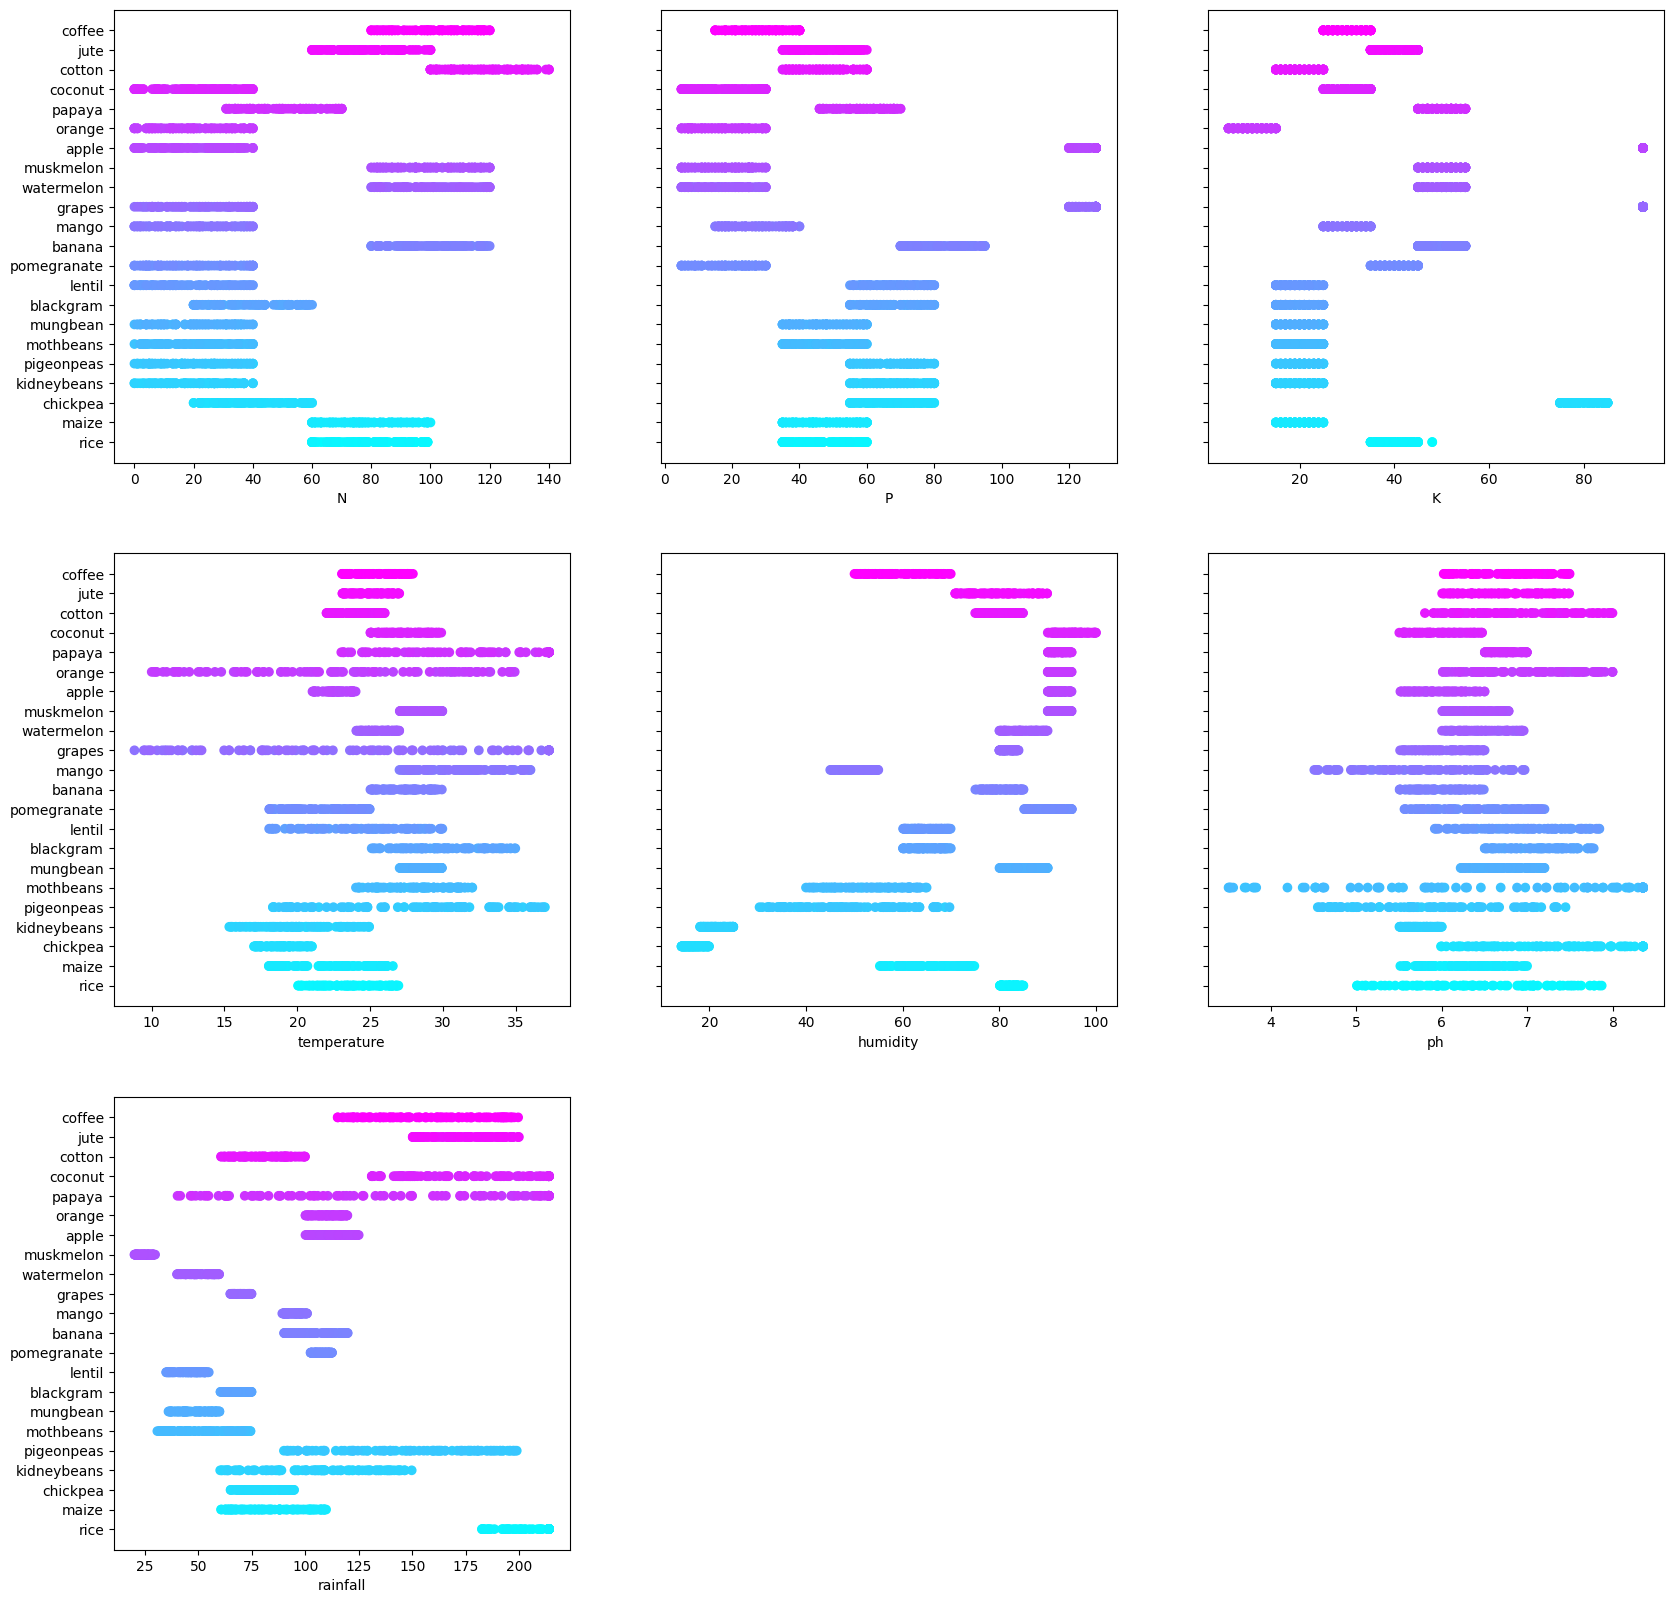

In [388]:
#ploting each input feature v/s output
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(20,20),sharey=True)
ax[0][0].scatter(crop_data['N'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[0][0].set_xlabel('N')
plt.title('distribution of values of each input features for each crops', fontsize = 15, c='black')
ax[0][1].scatter(crop_data['P'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[0][1].set_xlabel('P')
ax[0][2].scatter(crop_data['K'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[0][2].set_xlabel('K')
ax[1][0].scatter(crop_data['temperature'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[1][0].set_xlabel('temperature')
ax[1][1].scatter(crop_data['humidity'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[1][1].set_xlabel('humidity')
ax[1][2].scatter(crop_data['ph'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[1][2].set_xlabel('ph')
ax[2][0].scatter(crop_data['rainfall'], crop_data['label'], c=np.arange(len(crop_data['K'])),cmap='cool')
ax[2][0].set_xlabel('rainfall')
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])


plt.show()


In [389]:
#pair plot
# sea.pairplot(crop_data,hue='label')

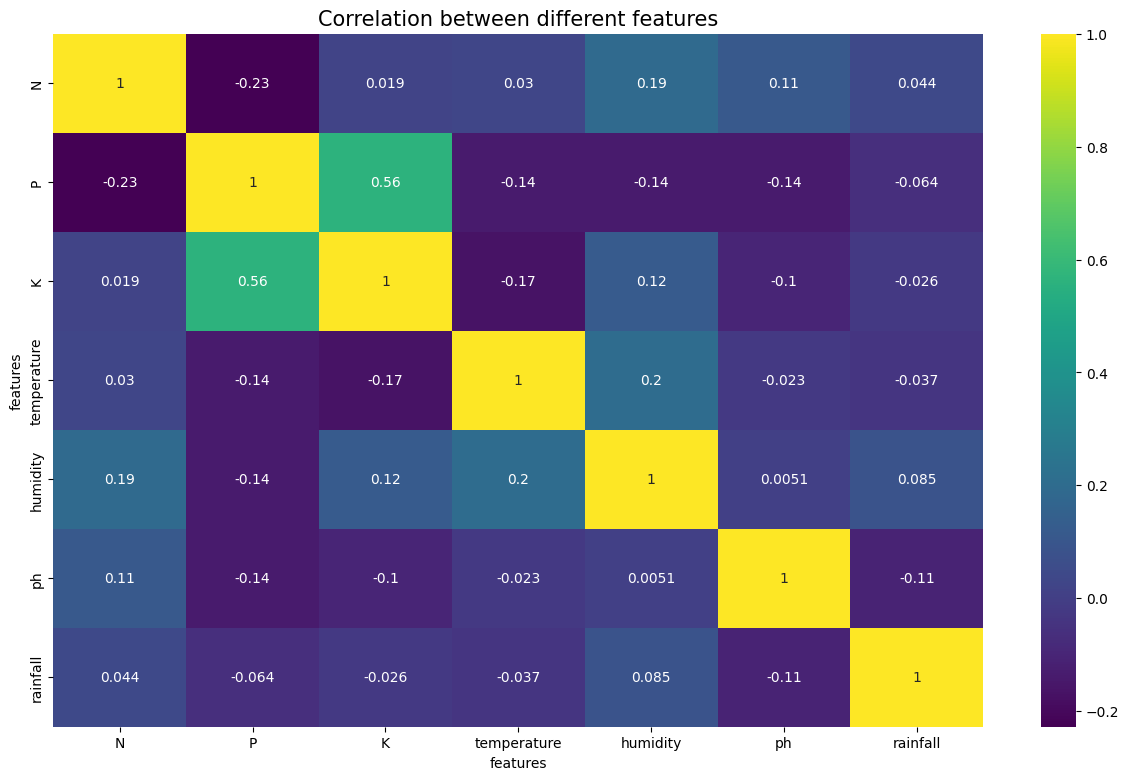

In [390]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
inputfeature=crop_data.drop('label',axis=1)
sea.heatmap(inputfeature.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [391]:
#feature extraction

x=crop_data.drop('label', axis=1)
y=crop_data['label']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

In [392]:
# model creating using KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

predicted_values = knn.predict(xtest)
acknn = metrics.accuracy_score(ytest, predicted_values)
acknn


0.9795454545454545

In [393]:
# tunning hyperparametter

grid_params = { 'n_neighbors' : [7,8,9,10],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(xtrain, ytrain)
print('best parameters:',g_res.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
best parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [394]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric = 'manhattan')
knn_1.fit(xtrain, ytrain)
predicted_values1= knn_1.predict(xtest)
acknn1 = metrics.accuracy_score(ytest, predicted_values1)
acknn1

0.9818181818181818

<AxesSubplot: >

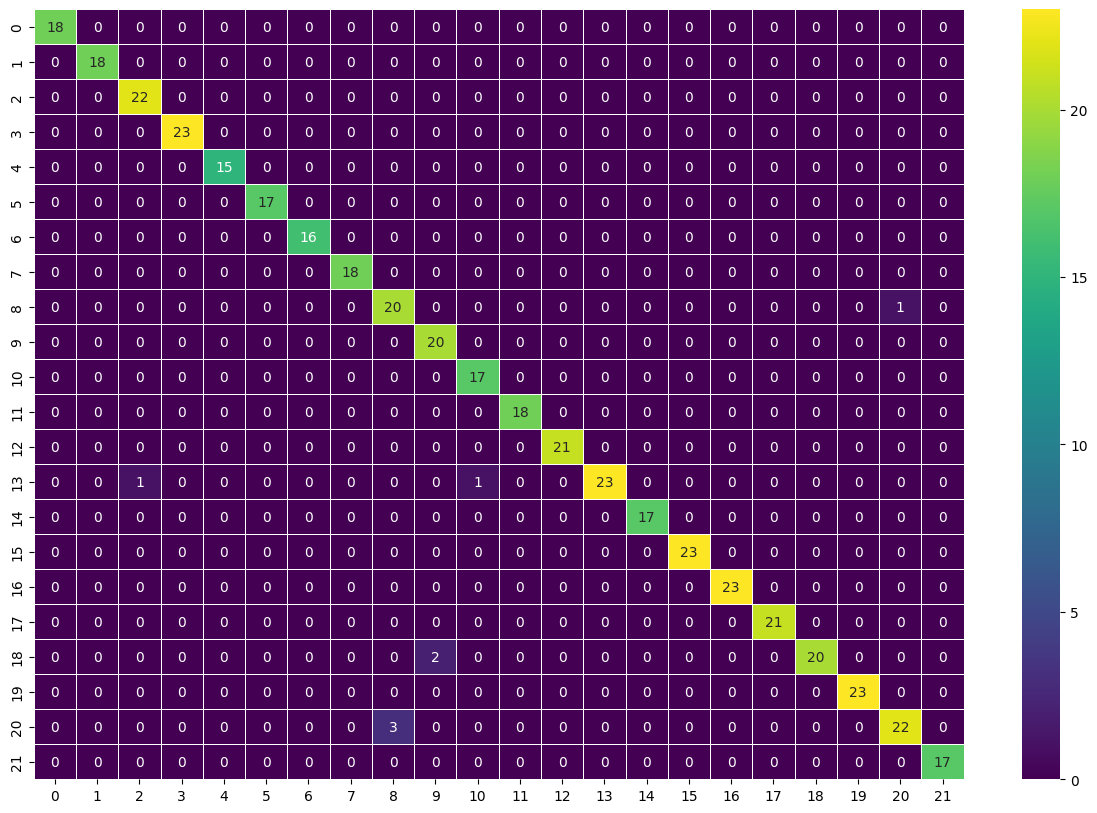

In [395]:
# getting confusion_matrix
cm = confusion_matrix(ytest,predicted_values1)

#visulizing confusion matrix
fig,ax1=plt.subplots(figsize=(15,10))
sea.heatmap(cm,annot=True,cmap='viridis',linewidth=0.5,ax=ax1)

In [396]:
print(classification_report(ytest,predicted_values1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.94      1.00      0.97        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.92      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [397]:
#model creating using decision tree

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DT.fit(xtrain,ytrain)

predicted_values_d = DT.predict(xtest)
acdt = metrics.accuracy_score(ytest, predicted_values_d)
acdt



0.9272727272727272

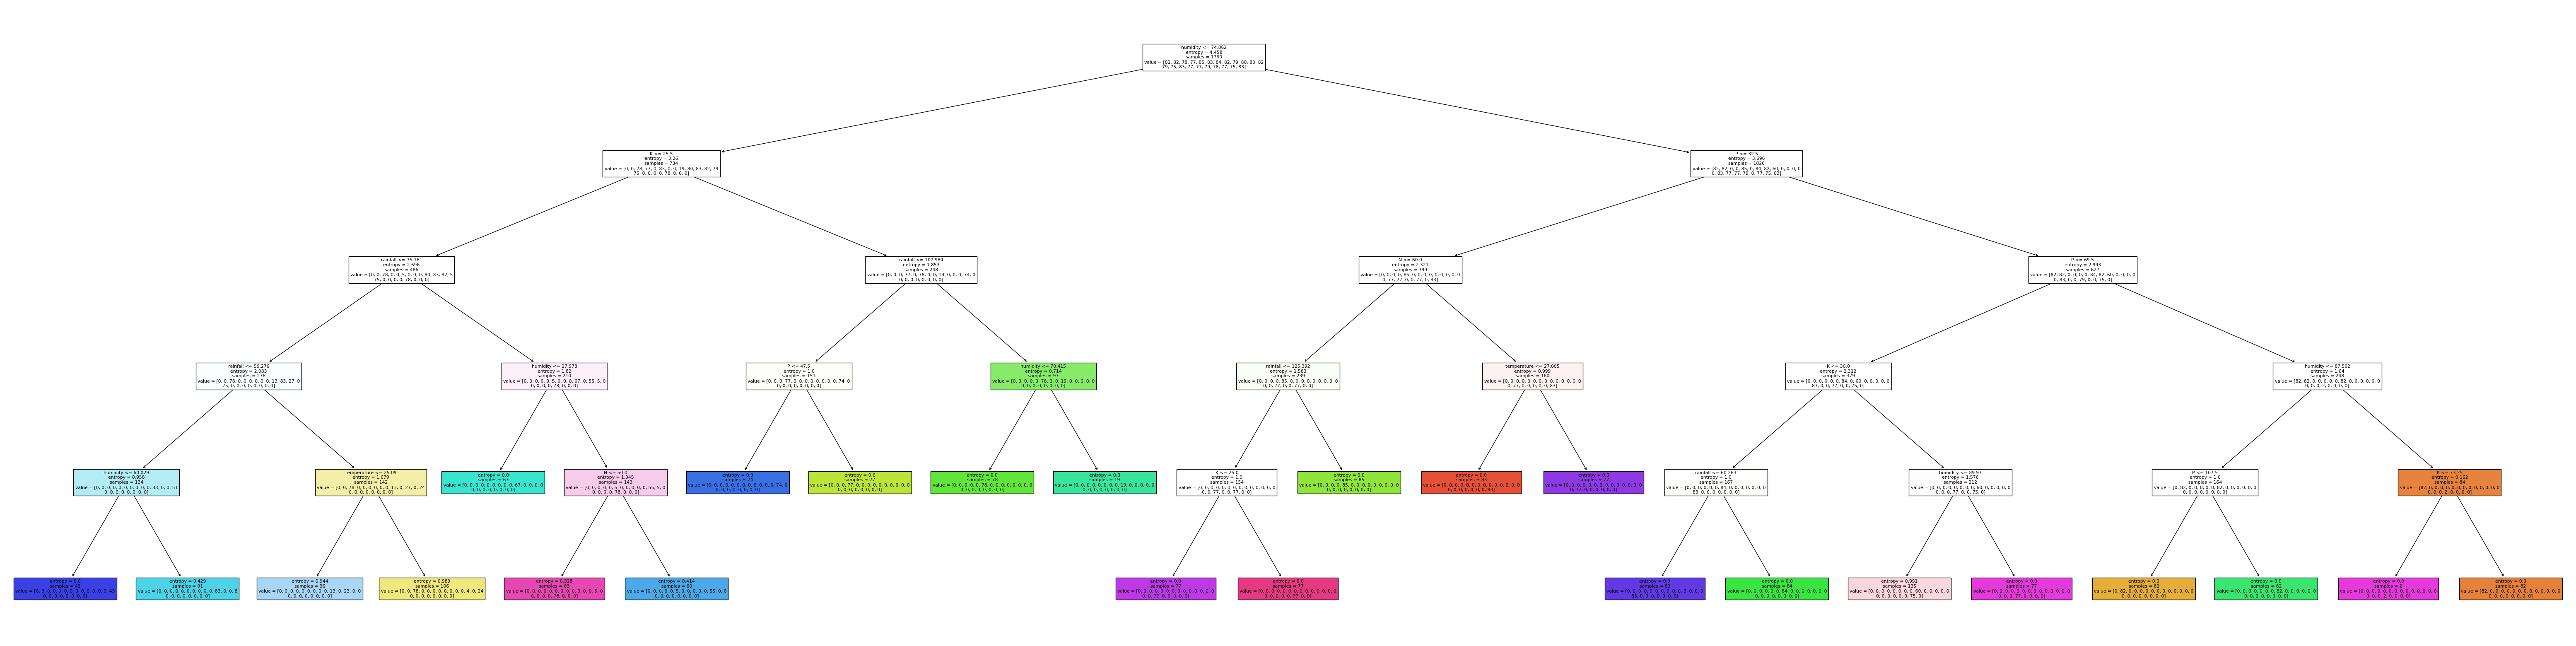

In [398]:

from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(DT, feature_names=xtrain.columns, max_depth=5, filled=True);

In [399]:
# finding hyper parameter

hyperparameters = {
    'max_depth': range(12,17),
    'min_samples_split': range(2,5),
    'min_samples_leaf': range(1,3)
}

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(DT, hyperparameters, cv=5)

# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [400]:
#useing best hyperparameter 

DT_1 = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=12,min_samples_leaf=1,min_samples_split=4)

DT_1.fit(xtrain,ytrain)

predicted_values_d1 = DT_1.predict(xtest)
acdt1= metrics.accuracy_score(ytest, predicted_values_d1)
acdt1

0.9931818181818182

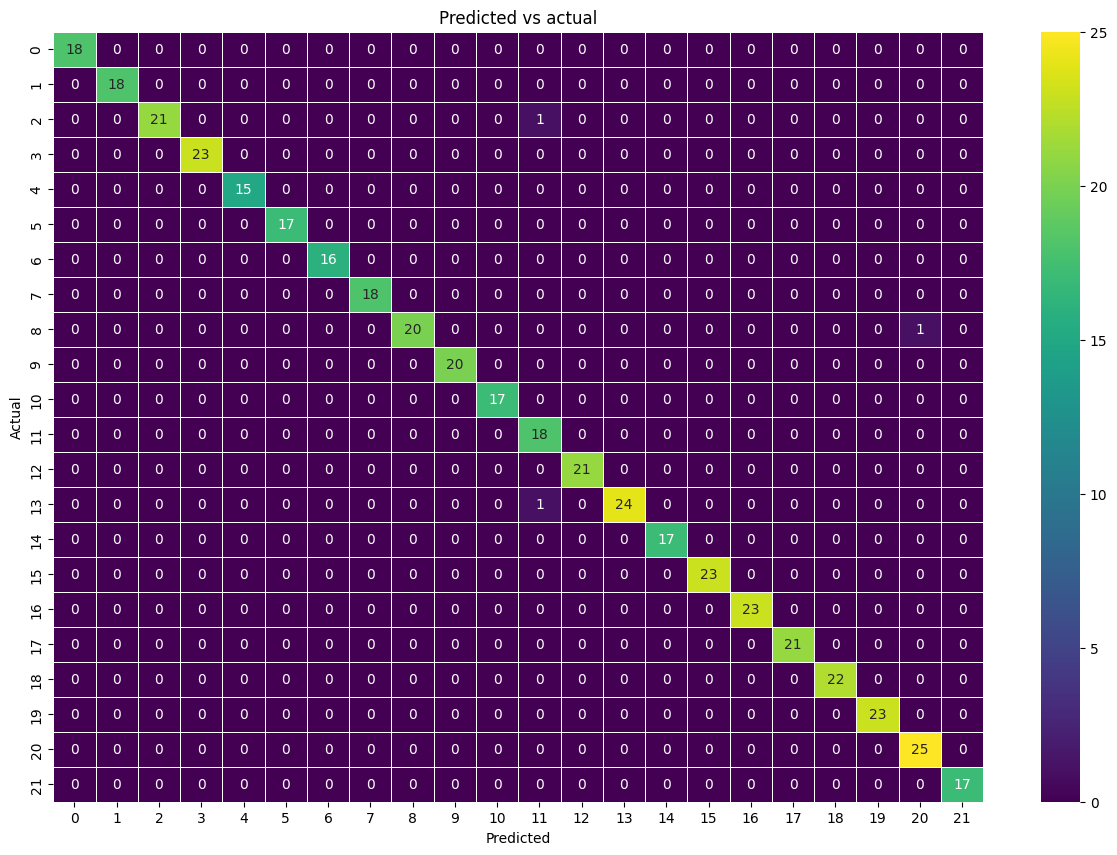

In [401]:
cm_dt = confusion_matrix(ytest,predicted_values_d1)

f, ax = plt.subplots(figsize=(15,10))
sea.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [402]:
print(classification_report(ytest,predicted_values_d1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.95      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       0.90      1.00      0.95        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [403]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=3, random_state=42)
RF.fit(xtrain,ytrain)
predicted_values_r = RF.predict(xtest)
acrf = metrics.accuracy_score(ytest, predicted_values_r)
acrf


0.9863636363636363

In [404]:
#finding best parameter

param_grid = {'n_estimators': [10,20,50],
              'max_features': ['sqrt', 'log2'],              
              'class_weight': ['balanced', 'balanced_subsample', None]}

# Create a grid search object
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'class_weight': 'balanced', 'max_features': 'sqrt', 'n_estimators': 20}


In [405]:
RF_1 = RandomForestClassifier(n_estimators=20, random_state=42,class_weight='balanced',max_features='sqrt')
RF_1.fit(xtrain,ytrain)
predicted_values_r1 = RF_1.predict(xtest)
acrf1 = metrics.accuracy_score(ytest, predicted_values_r1)
acrf1

0.9977272727272727

<AxesSubplot: >

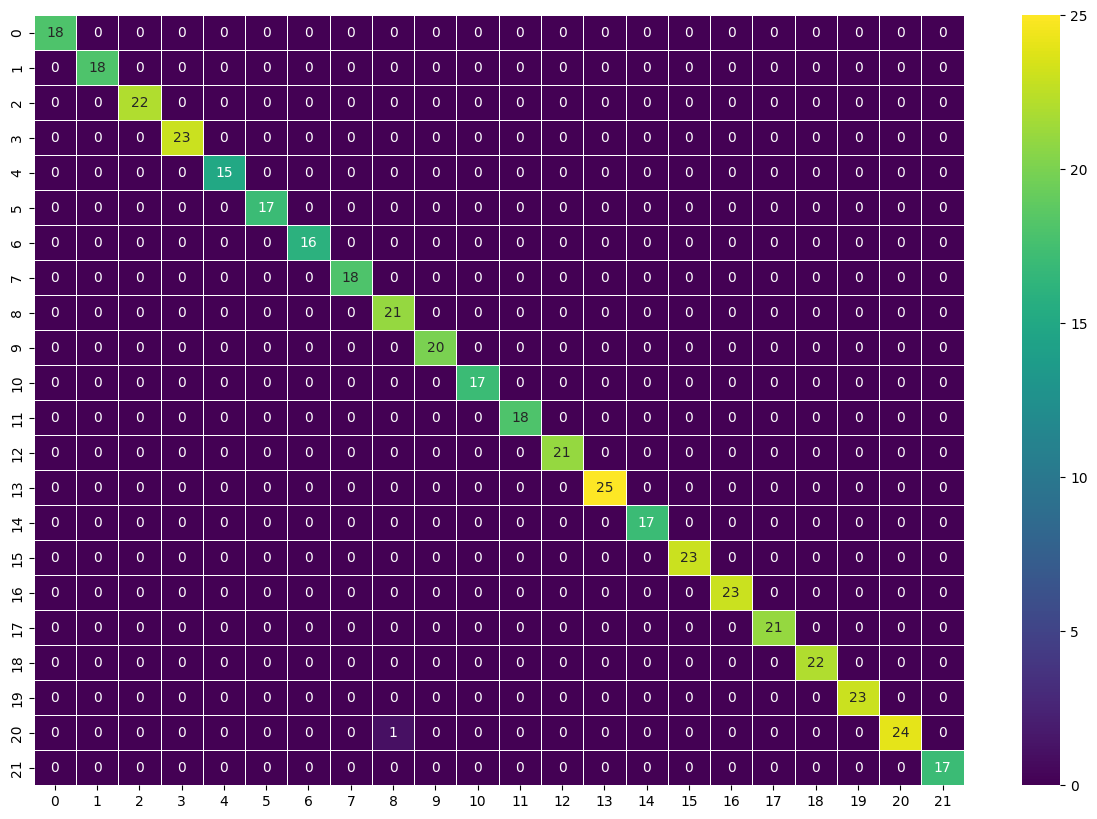

In [406]:
# getting confusion_matrix
cm = confusion_matrix(ytest,predicted_values_r1)

#visulizing confusion matrix
fig,ax1=plt.subplots(figsize=(15,10))
sea.heatmap(cm,annot=True,cmap='viridis',linewidth=0.5,ax=ax1)

In [407]:
print(classification_report(ytest,predicted_values_r1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [408]:
# model creating using naive bayes
from sklearn.naive_bayes import GaussianNB
naivebayes=GaussianNB()

naivebayes.fit(xtrain,ytrain)
predict_values=naivebayes.predict(xtest)
acnb=metrics.accuracy_score(ytest,predict_values)
acnb

0.9954545454545455

In [409]:
#tunning the model by changing alpha hyperparameter

#searching for hyperparameter

alpha_values = {'var_smoothing':np.logspace(-9, 0, num=10)}

grid_search = GridSearchCV(estimator=naivebayes, param_grid=alpha_values, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print('Best parameters:', grid_search.best_params_)


Best parameters: {'var_smoothing': 1e-09}


In [410]:
#setting that  hyperparameter
naivebayes_1=GaussianNB(var_smoothing=1e-09)
naivebayes_1.fit(xtrain,ytrain)
predict_values_1=naivebayes_1.predict(xtest)
acnb1=metrics.accuracy_score(ytest,predict_values_1)
acnb1


0.9954545454545455

<AxesSubplot: >

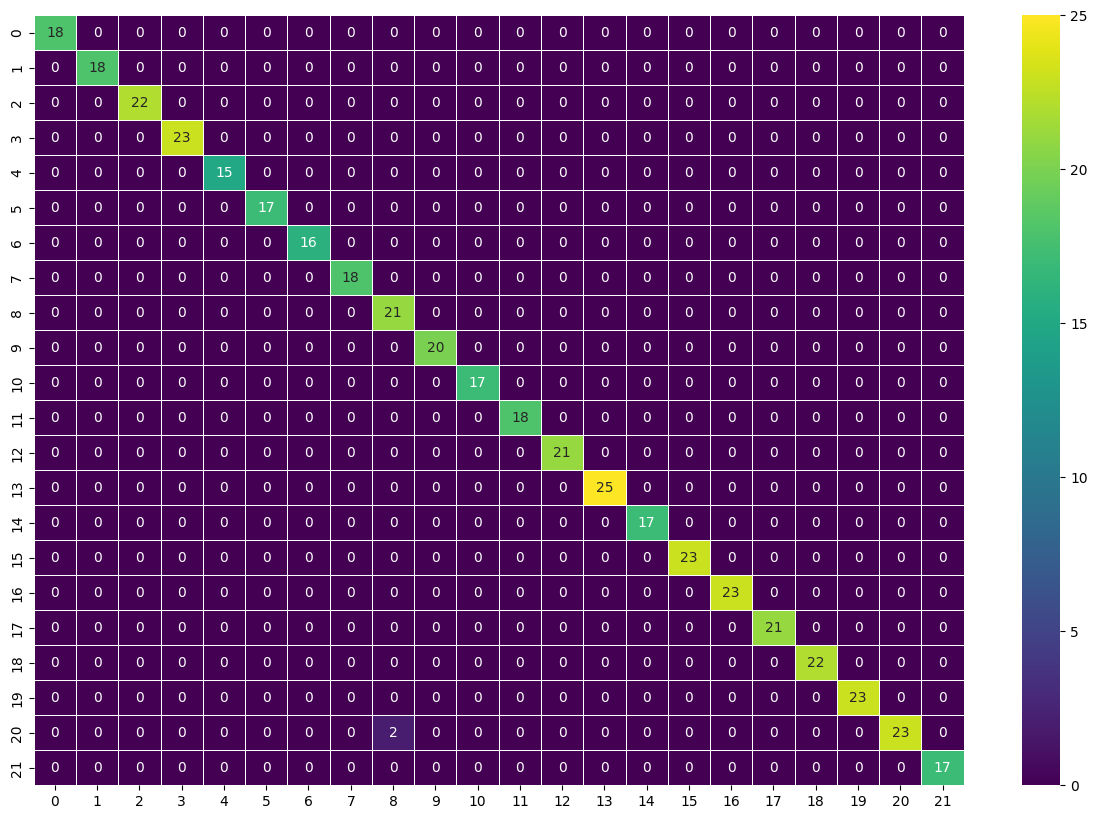

In [411]:
# getting confusion_matrix
cm = confusion_matrix(ytest,predict_values_1)

#visulizing confusion matrix
fig,ax1=plt.subplots(figsize=(15,10))
sea.heatmap(cm,annot=True,cmap='viridis',linewidth=0.5,ax=ax1)

In [412]:

# getting some info like precision. recall, f1-score, support from confusion marix
print(classification_report(ytest,predict_values_1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.91      1.00      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

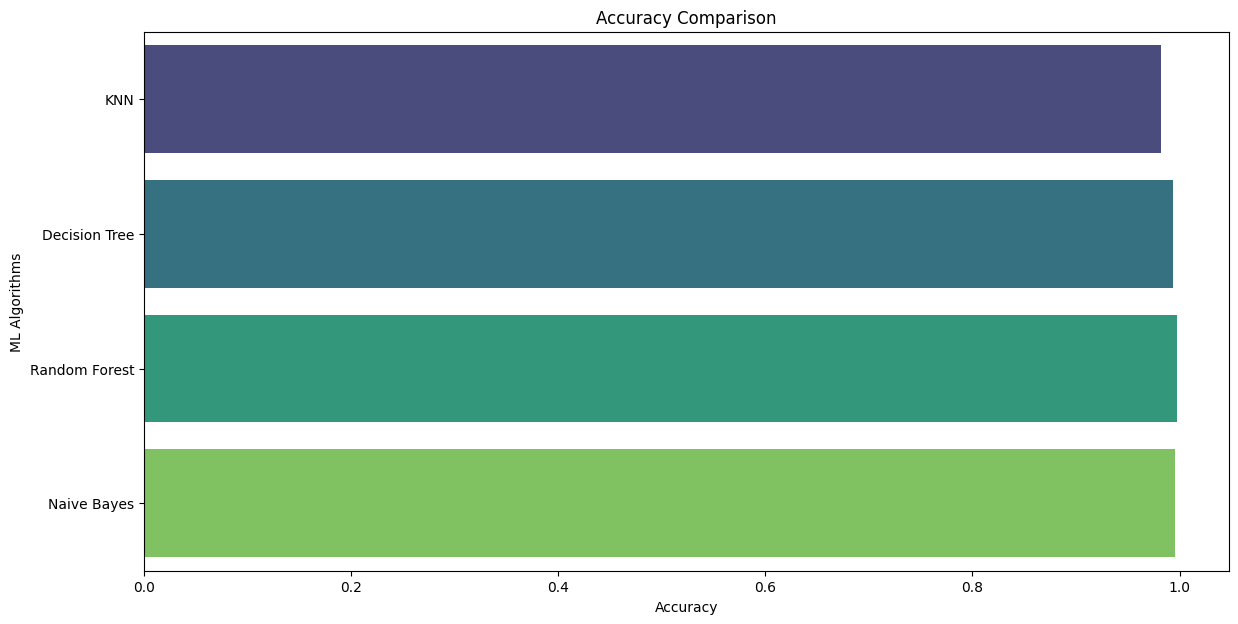

In [422]:
#accurary comparision
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sea.barplot(x =[acknn1,acdt1,acrf1,acnb1],y = ['KNN','Decision Tree','Random Forest','Naive Bayes'],palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [425]:
#displaying accurary value of each model
accuraries={'KNN':acknn1,'Decision Tree':acdt1,'Random Forest':acrf1,'Naive Bayes':acnb1}
accuraries

{'KNN': 0.9818181818181818,
 'Decision Tree': 0.9931818181818182,
 'Random Forest': 0.9977272727272727,
 'Naive Bayes': 0.9954545454545455}

In [457]:
import joblib
# Save your model to a file
joblib.dump(RF_1, 'crop_recomend.joblib')

['crop_recomend.joblib']

In [454]:
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,53.369308,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.000000,41.0,21.770462,80.319644,7.038096,213.841241,rice
2,60,55.000000,44.0,23.004459,82.320763,7.840207,213.841241,rice
3,74,35.000000,40.0,26.491096,80.158363,6.980401,213.841241,rice
4,78,42.000000,42.0,20.130175,81.604873,7.628473,213.841241,rice
...,...,...,...,...,...,...,...,...
2195,107,34.000000,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15.000000,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33.000000,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32.000000,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [455]:
inp=[[90,	53.369308,	43.0	,20.879744,	82.002744,	6.502985,	202.935536]]


In [460]:
pre=RF_1.predict(inp)
pre[0]

c:\Users\Sharul H N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'rice'

In [462]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.749762,38.385455,25.543788,71.481779,6.459767,101.986465
std,36.917334,31.426092,23.462113,4.861716,22.263812,0.744425,51.165743
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,128.000000,92.500000,37.250073,99.981876,8.351567,213.841241
